## Import Packages

In [25]:
import gensim
import numpy as np
import pandas as pd
import nltk
import multiprocessing
import networkx as nx
import time;
import sys;
import multiprocessing;
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt;
from itertools import cycle;
from gensim.models.keyedvectors import KeyedVectors

In [36]:
import sklearn
from sklearn.manifold import TSNE

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import csv
from gensim.models import Phrases

In [3]:
import matplotlib.pyplot as plt;

In [4]:
from node2vec import Node2Vec

In [5]:
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Import Data

In [6]:
df = pd.read_csv('/Users/maitreyimokashi/Documents/Thesis/Data/misc/user_post.csv')
df.head()

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PostID,UserID,Username,RawText
0,F162 T829657 original,199312,JohnSmith,Immuno-Oncology (IO) and Immunotherapy drugs ...
1,F162 T829657 post_4337424,48805,wallycat,I'm no expert.I found this and maybe it wi...
2,F162 T829657 post_4337443,120961,SpecialK,The Her2+ recurrence prevention trial I di...
3,F162 T829657 post_4353477,203258,chrissie29,SpecialK what immune drug was part of your...
4,F162 T829657 post_4353488,120961,SpecialK,chrissie - it was the GP2 peptide vaccine ...


In [7]:
df[['ID', 'Post_ID', 'Post_No']] = pd.DataFrame([ x.split() for x in df['PostID'].tolist() ])

In [8]:
df.head()

,PostID,UserID,Username,RawText,ID,Post_ID,Post_No
0,F162 T829657 original,199312,JohnSmith,Immuno-Oncology (IO) and Immunotherapy drugs ...,F162,T829657,original
1,F162 T829657 post_4337424,48805,wallycat,I'm no expert.I found this and maybe it wi...,F162,T829657,post_4337424
2,F162 T829657 post_4337443,120961,SpecialK,The Her2+ recurrence prevention trial I di...,F162,T829657,post_4337443
3,F162 T829657 post_4353477,203258,chrissie29,SpecialK what immune drug was part of your...,F162,T829657,post_4353477
4,F162 T829657 post_4353488,120961,SpecialK,chrissie - it was the GP2 peptide vaccine ...,F162,T829657,post_4353488


In [10]:
df.shape

(404192, 7)

In [11]:
df_new = df[['UserID','Post_ID']]

In [85]:
df_new.head()

,UserID,Post_ID
0,199312,T829657
1,48805,T829657
2,120961,T829657
3,203258,T829657
4,120961,T829657


In [13]:
df.loc[df['Post_ID'] == 'T812166']

,PostID,UserID,Username,RawText,ID,Post_ID,Post_No
259536,F44 T812166 original,166421,nihahi,"Welcome all, to the ""lounge"" for ladies who h...",F44,T812166,original
259537,F44 T812166 post_3726257,133414,Sharon1942,"Nihahi, thanks for starting this thread. ...",F44,T812166,post_3726257
259538,F44 T812166 post_3726346,150052,liefie,"Dear Nihahi, Thanks for starting this loun...",F44,T812166,post_3726346
259539,F44 T812166 post_3726360,141736,sbelizabeth,"Hi, sisters! I found the door, let myself...",F44,T812166,post_3726360
259540,F44 T812166 post_3726415,167447,Morningsun1,"Cheers, nihahi, Sharon, liefie, and sbe! A...",F44,T812166,post_3726415
259541,F44 T812166 post_3726426,159826,MartyJ,Thanks for thinking of this Nihahi! Great...,F44,T812166,post_3726426
259542,F44 T812166 post_3726452,167447,Morningsun1,I am going to Erie to play in a bridge tou...,F44,T812166,post_3726452
259543,F44 T812166 post_3726476,168897,sweetpickle,Hola chicas! :-) Thanks for starting th...,F44,T812166,post_3726476
259544,F44 T812166 post_3726546,159826,MartyJ,We are going to a Downton Abby dinner next...,F44,T812166,post_3726546
259545,F44 T812166 post_3726560,167447,Morningsun1,"Post a picture, when you finish, Marty.",F44,T812166,post_3726560


In [14]:
posts = []
for i in df['Post_ID']:
    posts.append(i)
    
print(len(posts))

404192


In [15]:
df = df_new.drop(df_new[df_new['Post_ID']=='T812166'].index)
df = df.drop(df[df['Post_ID']=='T843467'].index)

In [135]:
df.head()

,UserID,Post_ID
0,199312,T829657
1,48805,T829657
2,120961,T829657
3,203258,T829657
4,120961,T829657


In [16]:
edge_list = list(zip(df["UserID"],df["Post_ID"]))
edge_list[1000:1020]

[(21481, 'T646524'),
 (8594, 'T646524'),
 (11221, 'T646779'),
 (35344, 'T646779'),
 (34919, 'T646779'),
 (11221, 'T646779'),
 (11348, 'T646779'),
 (26535, 'T646779'),
 (991, 'T646779'),
 (30817, 'T646779'),
 (991, 'T646779'),
 (11221, 'T646779'),
 (27007, 'T646779'),
 (48567, 'T647135'),
 (51843, 'T647135'),
 (48567, 'T647135'),
 (42177, 'T647135'),
 (52992, 'T647135'),
 (48567, 'T647135'),
 (991, 'T647135')]

In [17]:
KG = nx.Graph(edge_list)
KG.number_of_nodes(), KG.number_of_edges()

(42556, 125092)

In [18]:
##largest_cc = max(nx.connected_components(KG), key=len)
##KG = nx.subgraph(KG, largest_cc)
##KG.number_of_nodes(), KG.number_of_edges()

In [19]:
n2v_obj = Node2Vec(KG, dimensions=20, walk_length=15, num_walks=100, p=1, q=1, workers=1)

Generating walks (CPU: 1): 100%|██████████| 100/100 [33:16<00:00, 20.05s/it]


In [20]:
n2v_obj

In [21]:
model = n2v_obj.fit(window=3, min_count=1, batch_words=4)

2020-01-22 06:52:20,344 : INFO : collecting all words and their counts
2020-01-22 06:52:20,345 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-01-22 06:52:20,385 : INFO : PROGRESS: at sentence #10000, processed 150000 words, keeping 29287 word types
2020-01-22 06:52:20,423 : INFO : PROGRESS: at sentence #20000, processed 300000 words, keeping 35099 word types
2020-01-22 06:52:20,458 : INFO : PROGRESS: at sentence #30000, processed 450000 words, keeping 37205 word types
2020-01-22 06:52:20,496 : INFO : PROGRESS: at sentence #40000, processed 600000 words, keeping 38015 word types
2020-01-22 06:52:20,534 : INFO : PROGRESS: at sentence #50000, processed 750000 words, keeping 38100 word types
2020-01-22 06:52:20,572 : INFO : PROGRESS: at sentence #60000, processed 900000 words, keeping 38100 word types
2020-01-22 06:52:20,610 : INFO : PROGRESS: at sentence #70000, processed 1050000 words, keeping 38100 word types
2020-01-22 06:52:20,647 : INFO : PROGRESS: at

2020-01-22 06:52:23,148 : INFO : PROGRESS: at sentence #720000, processed 10800000 words, keeping 38100 word types
2020-01-22 06:52:23,188 : INFO : PROGRESS: at sentence #730000, processed 10950000 words, keeping 38100 word types
2020-01-22 06:52:23,221 : INFO : PROGRESS: at sentence #740000, processed 11100000 words, keeping 38100 word types
2020-01-22 06:52:23,256 : INFO : PROGRESS: at sentence #750000, processed 11250000 words, keeping 38100 word types
2020-01-22 06:52:23,290 : INFO : PROGRESS: at sentence #760000, processed 11400000 words, keeping 38100 word types
2020-01-22 06:52:23,320 : INFO : PROGRESS: at sentence #770000, processed 11550000 words, keeping 38100 word types
2020-01-22 06:52:23,353 : INFO : PROGRESS: at sentence #780000, processed 11700000 words, keeping 38100 word types
2020-01-22 06:52:23,384 : INFO : PROGRESS: at sentence #790000, processed 11850000 words, keeping 38100 word types
2020-01-22 06:52:23,422 : INFO : PROGRESS: at sentence #800000, processed 120000

2020-01-22 06:52:26,848 : INFO : PROGRESS: at sentence #1430000, processed 21450000 words, keeping 38100 word types
2020-01-22 06:52:26,883 : INFO : PROGRESS: at sentence #1440000, processed 21600000 words, keeping 38100 word types
2020-01-22 06:52:26,919 : INFO : PROGRESS: at sentence #1450000, processed 21750000 words, keeping 38100 word types
2020-01-22 06:52:26,960 : INFO : PROGRESS: at sentence #1460000, processed 21900000 words, keeping 38100 word types
2020-01-22 06:52:26,998 : INFO : PROGRESS: at sentence #1470000, processed 22050000 words, keeping 38100 word types
2020-01-22 06:52:27,037 : INFO : PROGRESS: at sentence #1480000, processed 22200000 words, keeping 38100 word types
2020-01-22 06:52:27,079 : INFO : PROGRESS: at sentence #1490000, processed 22350000 words, keeping 38100 word types
2020-01-22 06:52:27,121 : INFO : PROGRESS: at sentence #1500000, processed 22500000 words, keeping 38100 word types
2020-01-22 06:52:27,162 : INFO : PROGRESS: at sentence #1510000, process

2020-01-22 06:52:29,365 : INFO : PROGRESS: at sentence #2140000, processed 32100000 words, keeping 38100 word types
2020-01-22 06:52:29,401 : INFO : PROGRESS: at sentence #2150000, processed 32250000 words, keeping 38100 word types
2020-01-22 06:52:29,437 : INFO : PROGRESS: at sentence #2160000, processed 32400000 words, keeping 38100 word types
2020-01-22 06:52:29,474 : INFO : PROGRESS: at sentence #2170000, processed 32550000 words, keeping 38100 word types
2020-01-22 06:52:29,512 : INFO : PROGRESS: at sentence #2180000, processed 32700000 words, keeping 38100 word types
2020-01-22 06:52:29,546 : INFO : PROGRESS: at sentence #2190000, processed 32850000 words, keeping 38100 word types
2020-01-22 06:52:29,582 : INFO : PROGRESS: at sentence #2200000, processed 33000000 words, keeping 38100 word types
2020-01-22 06:52:29,618 : INFO : PROGRESS: at sentence #2210000, processed 33150000 words, keeping 38100 word types
2020-01-22 06:52:29,654 : INFO : PROGRESS: at sentence #2220000, process

2020-01-22 06:52:31,930 : INFO : PROGRESS: at sentence #2850000, processed 42750000 words, keeping 38100 word types
2020-01-22 06:52:31,964 : INFO : PROGRESS: at sentence #2860000, processed 42900000 words, keeping 38100 word types
2020-01-22 06:52:32,002 : INFO : PROGRESS: at sentence #2870000, processed 43050000 words, keeping 38100 word types
2020-01-22 06:52:32,040 : INFO : PROGRESS: at sentence #2880000, processed 43200000 words, keeping 38100 word types
2020-01-22 06:52:32,078 : INFO : PROGRESS: at sentence #2890000, processed 43350000 words, keeping 38100 word types
2020-01-22 06:52:32,114 : INFO : PROGRESS: at sentence #2900000, processed 43500000 words, keeping 38100 word types
2020-01-22 06:52:32,151 : INFO : PROGRESS: at sentence #2910000, processed 43650000 words, keeping 38100 word types
2020-01-22 06:52:32,187 : INFO : PROGRESS: at sentence #2920000, processed 43800000 words, keeping 38100 word types
2020-01-22 06:52:32,222 : INFO : PROGRESS: at sentence #2930000, process

2020-01-22 06:52:34,624 : INFO : PROGRESS: at sentence #3560000, processed 53400000 words, keeping 38100 word types
2020-01-22 06:52:34,681 : INFO : PROGRESS: at sentence #3570000, processed 53550000 words, keeping 38100 word types
2020-01-22 06:52:34,731 : INFO : PROGRESS: at sentence #3580000, processed 53700000 words, keeping 38100 word types
2020-01-22 06:52:34,774 : INFO : PROGRESS: at sentence #3590000, processed 53850000 words, keeping 38100 word types
2020-01-22 06:52:34,811 : INFO : PROGRESS: at sentence #3600000, processed 54000000 words, keeping 38100 word types
2020-01-22 06:52:34,845 : INFO : PROGRESS: at sentence #3610000, processed 54150000 words, keeping 38100 word types
2020-01-22 06:52:34,878 : INFO : PROGRESS: at sentence #3620000, processed 54300000 words, keeping 38100 word types
2020-01-22 06:52:34,910 : INFO : PROGRESS: at sentence #3630000, processed 54450000 words, keeping 38100 word types
2020-01-22 06:52:34,943 : INFO : PROGRESS: at sentence #3640000, process

2020-01-22 06:52:37,035 : INFO : Loading a fresh vocabulary
2020-01-22 06:52:37,202 : INFO : effective_min_count=1 retains 38100 unique words (100% of original 38100, drops 0)
2020-01-22 06:52:37,202 : INFO : effective_min_count=1 leaves 63834000 word corpus (100% of original 63834000, drops 0)
2020-01-22 06:52:37,288 : INFO : deleting the raw counts dictionary of 38100 items
2020-01-22 06:52:37,289 : INFO : sample=0.001 downsamples 7 most-common words
2020-01-22 06:52:37,290 : INFO : downsampling leaves estimated 63181995 word corpus (99.0% of prior 63834000)
2020-01-22 06:52:37,413 : INFO : estimated required memory for 38100 words and 20 dimensions: 25146000 bytes
2020-01-22 06:52:37,414 : INFO : resetting layer weights
2020-01-22 06:52:37,915 : INFO : training model with 1 workers on 38100 vocabulary and 20 features, using sg=0 hs=0 sample=0.001 negative=5 window=3
2020-01-22 06:52:38,917 : INFO : EPOCH 1 - PROGRESS: at 0.34% examples, 211973 words/s, in_qsize 2, out_qsize 0
2020-0

2020-01-22 06:53:43,920 : INFO : EPOCH 1 - PROGRESS: at 26.11% examples, 249973 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:53:44,920 : INFO : EPOCH 1 - PROGRESS: at 26.52% examples, 250104 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:53:45,920 : INFO : EPOCH 1 - PROGRESS: at 26.93% examples, 250205 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:53:46,920 : INFO : EPOCH 1 - PROGRESS: at 27.33% examples, 250278 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:53:47,920 : INFO : EPOCH 1 - PROGRESS: at 27.75% examples, 250438 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:53:48,920 : INFO : EPOCH 1 - PROGRESS: at 28.16% examples, 250613 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:53:49,921 : INFO : EPOCH 1 - PROGRESS: at 28.58% examples, 250777 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:53:50,921 : INFO : EPOCH 1 - PROGRESS: at 28.99% examples, 250921 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:53:51,921 : INFO : EPOCH 1 - PROGRESS: at 29.40% examples, 251011 words/s, in_qsiz

2020-01-22 06:54:56,923 : INFO : EPOCH 1 - PROGRESS: at 53.84% examples, 244728 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:54:57,923 : INFO : EPOCH 1 - PROGRESS: at 54.20% examples, 244600 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:54:58,923 : INFO : EPOCH 1 - PROGRESS: at 54.58% examples, 244592 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:54:59,923 : INFO : EPOCH 1 - PROGRESS: at 55.00% examples, 244727 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:55:00,924 : INFO : EPOCH 1 - PROGRESS: at 55.42% examples, 244864 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:55:01,924 : INFO : EPOCH 1 - PROGRESS: at 55.83% examples, 244953 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:55:02,924 : INFO : EPOCH 1 - PROGRESS: at 56.25% examples, 245097 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:55:03,924 : INFO : EPOCH 1 - PROGRESS: at 56.67% examples, 245230 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:55:04,924 : INFO : EPOCH 1 - PROGRESS: at 57.09% examples, 245370 words/s, in_qsiz

2020-01-22 06:56:09,926 : INFO : EPOCH 1 - PROGRESS: at 82.63% examples, 246273 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:56:10,926 : INFO : EPOCH 1 - PROGRESS: at 83.01% examples, 246235 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:56:11,926 : INFO : EPOCH 1 - PROGRESS: at 83.37% examples, 246131 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:56:12,926 : INFO : EPOCH 1 - PROGRESS: at 83.72% examples, 246026 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:56:13,927 : INFO : EPOCH 1 - PROGRESS: at 84.02% examples, 245751 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:56:14,927 : INFO : EPOCH 1 - PROGRESS: at 84.42% examples, 245787 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:56:15,927 : INFO : EPOCH 1 - PROGRESS: at 84.84% examples, 245882 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:56:16,927 : INFO : EPOCH 1 - PROGRESS: at 85.26% examples, 245963 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:56:17,927 : INFO : EPOCH 1 - PROGRESS: at 85.67% examples, 246039 words/s, in_qsiz

2020-01-22 06:57:21,092 : INFO : EPOCH 2 - PROGRESS: at 10.15% examples, 228942 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:57:22,092 : INFO : EPOCH 2 - PROGRESS: at 10.47% examples, 228149 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:57:23,092 : INFO : EPOCH 2 - PROGRESS: at 10.78% examples, 227109 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:57:24,092 : INFO : EPOCH 2 - PROGRESS: at 11.16% examples, 227454 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:57:25,092 : INFO : EPOCH 2 - PROGRESS: at 11.53% examples, 227730 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:57:26,092 : INFO : EPOCH 2 - PROGRESS: at 11.94% examples, 228657 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:57:27,092 : INFO : EPOCH 2 - PROGRESS: at 12.35% examples, 229465 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:57:28,092 : INFO : EPOCH 2 - PROGRESS: at 12.76% examples, 230394 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:57:29,093 : INFO : EPOCH 2 - PROGRESS: at 13.18% examples, 231385 words/s, in_qsiz

2020-01-22 06:58:34,095 : INFO : EPOCH 2 - PROGRESS: at 37.63% examples, 235420 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:58:35,096 : INFO : EPOCH 2 - PROGRESS: at 38.05% examples, 235712 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:58:36,096 : INFO : EPOCH 2 - PROGRESS: at 38.47% examples, 235978 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:58:37,096 : INFO : EPOCH 2 - PROGRESS: at 38.89% examples, 236246 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:58:38,096 : INFO : EPOCH 2 - PROGRESS: at 39.30% examples, 236505 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:58:39,096 : INFO : EPOCH 2 - PROGRESS: at 39.60% examples, 236026 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:58:40,096 : INFO : EPOCH 2 - PROGRESS: at 39.92% examples, 235712 words/s, in_qsize 2, out_qsize 1
2020-01-22 06:58:41,096 : INFO : EPOCH 2 - PROGRESS: at 40.27% examples, 235580 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:58:42,096 : INFO : EPOCH 2 - PROGRESS: at 40.65% examples, 235605 words/s, in_qsiz

2020-01-22 06:59:47,099 : INFO : EPOCH 2 - PROGRESS: at 66.48% examples, 241397 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:59:48,099 : INFO : EPOCH 2 - PROGRESS: at 66.90% examples, 241539 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:59:49,099 : INFO : EPOCH 2 - PROGRESS: at 67.32% examples, 241656 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:59:50,099 : INFO : EPOCH 2 - PROGRESS: at 67.71% examples, 241703 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:59:51,099 : INFO : EPOCH 2 - PROGRESS: at 68.10% examples, 241707 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:59:52,099 : INFO : EPOCH 2 - PROGRESS: at 68.49% examples, 241740 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:59:53,099 : INFO : EPOCH 2 - PROGRESS: at 68.84% examples, 241628 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:59:54,099 : INFO : EPOCH 2 - PROGRESS: at 69.20% examples, 241551 words/s, in_qsize 2, out_qsize 0
2020-01-22 06:59:55,099 : INFO : EPOCH 2 - PROGRESS: at 69.56% examples, 241470 words/s, in_qsiz

2020-01-22 07:01:00,102 : INFO : EPOCH 2 - PROGRESS: at 93.55% examples, 239294 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:01:01,102 : INFO : EPOCH 2 - PROGRESS: at 93.94% examples, 239322 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:01:02,102 : INFO : EPOCH 2 - PROGRESS: at 94.30% examples, 239277 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:01:03,102 : INFO : EPOCH 2 - PROGRESS: at 94.65% examples, 239211 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:01:04,102 : INFO : EPOCH 2 - PROGRESS: at 95.05% examples, 239241 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:01:05,102 : INFO : EPOCH 2 - PROGRESS: at 95.41% examples, 239194 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:01:06,102 : INFO : EPOCH 2 - PROGRESS: at 95.81% examples, 239248 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:01:07,102 : INFO : EPOCH 2 - PROGRESS: at 96.22% examples, 239340 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:01:08,102 : INFO : EPOCH 2 - PROGRESS: at 96.64% examples, 239433 words/s, in_qsiz

2020-01-22 07:02:11,308 : INFO : EPOCH 3 - PROGRESS: at 22.64% examples, 260088 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:02:12,308 : INFO : EPOCH 3 - PROGRESS: at 23.04% examples, 259988 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:02:13,308 : INFO : EPOCH 3 - PROGRESS: at 23.45% examples, 259969 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:02:14,308 : INFO : EPOCH 3 - PROGRESS: at 23.83% examples, 259592 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:02:15,308 : INFO : EPOCH 3 - PROGRESS: at 24.25% examples, 259667 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:02:16,308 : INFO : EPOCH 3 - PROGRESS: at 24.65% examples, 259573 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:02:17,308 : INFO : EPOCH 3 - PROGRESS: at 25.03% examples, 259216 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:02:18,308 : INFO : EPOCH 3 - PROGRESS: at 25.43% examples, 259194 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:02:19,308 : INFO : EPOCH 3 - PROGRESS: at 25.86% examples, 259317 words/s, in_qsiz

2020-01-22 07:03:24,311 : INFO : EPOCH 3 - PROGRESS: at 51.54% examples, 254410 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:03:25,311 : INFO : EPOCH 3 - PROGRESS: at 51.91% examples, 254247 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:03:26,311 : INFO : EPOCH 3 - PROGRESS: at 52.25% examples, 253939 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:03:27,311 : INFO : EPOCH 3 - PROGRESS: at 52.56% examples, 253480 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:03:28,311 : INFO : EPOCH 3 - PROGRESS: at 52.88% examples, 253097 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:03:29,311 : INFO : EPOCH 3 - PROGRESS: at 53.23% examples, 252847 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:03:30,311 : INFO : EPOCH 3 - PROGRESS: at 53.52% examples, 252354 words/s, in_qsize 2, out_qsize 1
2020-01-22 07:03:31,312 : INFO : EPOCH 3 - PROGRESS: at 53.82% examples, 251865 words/s, in_qsize 2, out_qsize 2
2020-01-22 07:03:32,312 : INFO : EPOCH 3 - PROGRESS: at 54.14% examples, 251510 words/s, in_qsiz

2020-01-22 07:04:37,315 : INFO : EPOCH 3 - PROGRESS: at 78.25% examples, 245952 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:04:38,315 : INFO : EPOCH 3 - PROGRESS: at 78.67% examples, 246048 words/s, in_qsize 2, out_qsize 1
2020-01-22 07:04:39,315 : INFO : EPOCH 3 - PROGRESS: at 79.09% examples, 246147 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:04:40,315 : INFO : EPOCH 3 - PROGRESS: at 79.50% examples, 246217 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:04:41,315 : INFO : EPOCH 3 - PROGRESS: at 79.92% examples, 246311 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:04:42,315 : INFO : EPOCH 3 - PROGRESS: at 80.33% examples, 246384 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:04:43,315 : INFO : EPOCH 3 - PROGRESS: at 80.75% examples, 246480 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:04:44,315 : INFO : EPOCH 3 - PROGRESS: at 81.17% examples, 246555 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:04:45,315 : INFO : EPOCH 3 - PROGRESS: at 81.58% examples, 246627 words/s, in_qsiz

2020-01-22 07:05:48,781 : INFO : EPOCH 4 - PROGRESS: at 6.62% examples, 232381 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:05:49,781 : INFO : EPOCH 4 - PROGRESS: at 7.04% examples, 234151 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:05:50,781 : INFO : EPOCH 4 - PROGRESS: at 7.46% examples, 235670 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:05:51,781 : INFO : EPOCH 4 - PROGRESS: at 7.86% examples, 236470 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:05:52,781 : INFO : EPOCH 4 - PROGRESS: at 8.26% examples, 237311 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:05:53,781 : INFO : EPOCH 4 - PROGRESS: at 8.68% examples, 238304 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:05:54,781 : INFO : EPOCH 4 - PROGRESS: at 9.09% examples, 239195 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:05:55,781 : INFO : EPOCH 4 - PROGRESS: at 9.49% examples, 239756 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:05:56,781 : INFO : EPOCH 4 - PROGRESS: at 9.88% examples, 240173 words/s, in_qsize 2, out_

2020-01-22 07:07:01,784 : INFO : EPOCH 4 - PROGRESS: at 33.94% examples, 235629 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:07:02,784 : INFO : EPOCH 4 - PROGRESS: at 34.36% examples, 235970 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:07:03,784 : INFO : EPOCH 4 - PROGRESS: at 34.78% examples, 236308 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:07:04,784 : INFO : EPOCH 4 - PROGRESS: at 35.20% examples, 236621 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:07:05,784 : INFO : EPOCH 4 - PROGRESS: at 35.61% examples, 236797 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:07:06,784 : INFO : EPOCH 4 - PROGRESS: at 36.00% examples, 236942 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:07:07,784 : INFO : EPOCH 4 - PROGRESS: at 36.38% examples, 236930 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:07:08,784 : INFO : EPOCH 4 - PROGRESS: at 36.75% examples, 236916 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:07:09,784 : INFO : EPOCH 4 - PROGRESS: at 37.10% examples, 236778 words/s, in_qsiz

2020-01-22 07:08:14,787 : INFO : EPOCH 4 - PROGRESS: at 63.28% examples, 243794 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:08:15,787 : INFO : EPOCH 4 - PROGRESS: at 63.65% examples, 243722 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:08:16,787 : INFO : EPOCH 4 - PROGRESS: at 64.05% examples, 243788 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:08:17,787 : INFO : EPOCH 4 - PROGRESS: at 64.47% examples, 243924 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:08:18,787 : INFO : EPOCH 4 - PROGRESS: at 64.90% examples, 244060 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:08:19,787 : INFO : EPOCH 4 - PROGRESS: at 65.31% examples, 244159 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:08:20,787 : INFO : EPOCH 4 - PROGRESS: at 65.73% examples, 244295 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:08:21,787 : INFO : EPOCH 4 - PROGRESS: at 66.15% examples, 244415 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:08:22,787 : INFO : EPOCH 4 - PROGRESS: at 66.57% examples, 244534 words/s, in_qsiz

2020-01-22 07:09:27,790 : INFO : EPOCH 4 - PROGRESS: at 92.57% examples, 246786 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:09:28,790 : INFO : EPOCH 4 - PROGRESS: at 92.94% examples, 246721 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:09:29,790 : INFO : EPOCH 4 - PROGRESS: at 93.30% examples, 246651 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:09:30,790 : INFO : EPOCH 4 - PROGRESS: at 93.60% examples, 246406 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:09:31,790 : INFO : EPOCH 4 - PROGRESS: at 93.97% examples, 246351 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:09:32,790 : INFO : EPOCH 4 - PROGRESS: at 94.35% examples, 246317 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:09:33,791 : INFO : EPOCH 4 - PROGRESS: at 94.56% examples, 245860 words/s, in_qsize 2, out_qsize 1
2020-01-22 07:09:34,792 : INFO : EPOCH 4 - PROGRESS: at 94.69% examples, 245192 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:09:35,791 : INFO : EPOCH 4 - PROGRESS: at 94.87% examples, 244658 words/s, in_qsiz

2020-01-22 07:10:39,381 : INFO : EPOCH 5 - PROGRESS: at 19.57% examples, 247315 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:10:40,381 : INFO : EPOCH 5 - PROGRESS: at 19.98% examples, 247525 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:10:41,381 : INFO : EPOCH 5 - PROGRESS: at 20.35% examples, 247243 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:10:42,381 : INFO : EPOCH 5 - PROGRESS: at 20.73% examples, 247109 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:10:43,381 : INFO : EPOCH 5 - PROGRESS: at 21.15% examples, 247408 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:10:44,381 : INFO : EPOCH 5 - PROGRESS: at 21.53% examples, 247270 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:10:45,382 : INFO : EPOCH 5 - PROGRESS: at 21.92% examples, 247301 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:10:46,382 : INFO : EPOCH 5 - PROGRESS: at 22.27% examples, 246860 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:10:47,382 : INFO : EPOCH 5 - PROGRESS: at 22.61% examples, 246319 words/s, in_qsiz

2020-01-22 07:11:52,384 : INFO : EPOCH 5 - PROGRESS: at 48.01% examples, 246600 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:11:53,384 : INFO : EPOCH 5 - PROGRESS: at 48.30% examples, 246113 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:11:54,384 : INFO : EPOCH 5 - PROGRESS: at 48.58% examples, 245560 words/s, in_qsize 0, out_qsize 0
2020-01-22 07:11:55,384 : INFO : EPOCH 5 - PROGRESS: at 48.87% examples, 245052 words/s, in_qsize 2, out_qsize 1
2020-01-22 07:11:56,385 : INFO : EPOCH 5 - PROGRESS: at 49.15% examples, 244512 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:11:57,385 : INFO : EPOCH 5 - PROGRESS: at 49.45% examples, 244073 words/s, in_qsize 1, out_qsize 0
2020-01-22 07:11:58,385 : INFO : EPOCH 5 - PROGRESS: at 49.72% examples, 243508 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:11:59,385 : INFO : EPOCH 5 - PROGRESS: at 49.89% examples, 242492 words/s, in_qsize 1, out_qsize 1
2020-01-22 07:12:00,385 : INFO : EPOCH 5 - PROGRESS: at 50.11% examples, 241660 words/s, in_qsiz

2020-01-22 07:13:05,387 : INFO : EPOCH 5 - PROGRESS: at 74.75% examples, 240963 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:13:06,387 : INFO : EPOCH 5 - PROGRESS: at 75.15% examples, 241024 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:13:07,387 : INFO : EPOCH 5 - PROGRESS: at 75.56% examples, 241099 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:13:08,387 : INFO : EPOCH 5 - PROGRESS: at 75.96% examples, 241177 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:13:09,387 : INFO : EPOCH 5 - PROGRESS: at 76.37% examples, 241256 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:13:10,387 : INFO : EPOCH 5 - PROGRESS: at 76.78% examples, 241337 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:13:11,387 : INFO : EPOCH 5 - PROGRESS: at 77.19% examples, 241420 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:13:12,388 : INFO : EPOCH 5 - PROGRESS: at 77.59% examples, 241497 words/s, in_qsize 2, out_qsize 0
2020-01-22 07:13:13,388 : INFO : EPOCH 5 - PROGRESS: at 77.97% examples, 241468 words/s, in_qsiz

In [28]:
w2v_bin_path="w2v.bin"
model.wv.save_word2vec_format(w2v_bin_path, binary=True)
print("save %s ok." % w2v_bin_path)
    # test
    # sim = w2v.wv.similarity('大', '小')
    # print('大 vs 小 similarity score:', sim)
    # load model
model = KeyedVectors.load_word2vec_format(w2v_bin_path, binary=True)

2020-01-22 07:19:38,383 : INFO : storing 38100x20 projection weights into w2v.bin
2020-01-22 07:19:38,503 : INFO : loading projection weights from w2v.bin


save w2v.bin ok.


2020-01-22 07:19:39,132 : INFO : loaded (38100, 20) matrix from w2v.bin


In [29]:
for node, _ in model.most_similar('199312'):
    if len(node) < 7:
        print(node)

2020-01-22 07:20:01,676 : INFO : precomputing L2-norms of word weight vectors


228936
208298
205984
203354
207116
194432
205736
207270


In [30]:
for node, _ in model.most_similar('T646779'):
        print(node)

T691736
T670114
T665321
T621330
T705648
T693432
T690073
T677481
T671278
T660947


In [31]:
for node, _ in model.most_similar('217006'):
    if len(node) < 7:
        print(node)

227690
218479
147362
75888
224610


In [185]:
for node, _ in model.wv.most_similar('6952', topn = 1000):
    if len(node) < 7:
       # print(node)

55938
15123
56561
18257
60766
51477
55176
10831
62799
57213
6806
50783
45933
60978
2235
44528
18898
57963
16259
17019
38472
8042
47269
35431
47009
60684
59221
24172
59832
71360
68991
69977
35372
59504
53193
52327
10504
64251
80937
53486
49883
47644
4367
67113
56128
58766
1007
77106
30753
45901
69741
62935
32959
28865
55643
68420
41348
8067
49292
55529
43521
61830
13840
45358
75215
74978
41686
57952
70443
28887
65498
9685
34831
9360
2070
67072
54733
73017
8594
44566
39260
63997
991
67188
66172
8062
54878
66730
78837
68950
60467
66876
51195
57937
8446
61159
58797
84129
4654
60178
57847
62568
9346
67737
67605
31620
64695
9947
77580
8913
68844
32691
22436
14011
76653
56501
85443
65183
32903
59838
57526
63953
66261
66727
74815
23896
55027
74196
15527
56400
12957
62173
62638
56632
32328
29978
62893
69067
61126
27007
61264
60172
3681
49329
66298
52705
68903
48762
70174
56827
26901
8314
67749
88123
59534
68837
77420
76014
58358
47193
53610
41982
58353
66607
11186
10911
76354
59632
70268
42198


In [32]:
def get_word_table(table, key, sim_key='similarity', show_sim = True):
    if show_sim > 0.75:
        return pd.DataFrame(table, columns=[key, sim_key])
    else:
        return pd.DataFrame(table, columns=[key, sim_key])[key]



keys = ['217006', '147362','224203','57358','73711','67188','75888','991','57242'];
tables = [];
for key in keys:
        tables.append(get_word_table(model.wv.similar_by_word(key), key, show_sim=False))
user_cluster = pd.concat(tables, axis=1)

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':


In [33]:
user_cluster

,217006,147362,224203,57358,73711,67188,75888,991,57242
0,227690,75888,T836662,84636,69204,71360,147362,45901,58043
1,218479,227690,242798,65046,71232,66298,218479,11341,59619
2,147362,218479,T852365,70063,65294,67737,227690,51477,T695789
3,75888,217006,223169,71555,68792,67113,217006,57242,60023
4,T829657,T829657,T846555,60978,74288,69204,T829657,57213,58056
5,T773890,T773890,T852524,58947,71746,70443,T773890,59235,57406
6,T753050,T833141,210754,62033,76205,69977,T753050,44960,61392
7,T823898,T753050,208402,82946,72728,59498,T823898,41308,59527
8,T823905,T764310,T692911,87673,77343,74007,T823905,60275,53273
9,224610,T823898,60922,67391,76475,68420,T833141,39002,44916


In [34]:
player_nodes = [x for x in model.wv.vocab if len(x) < 7 and x not in df['Post_ID']]
embeddings = np.array([model.wv[x] for x in player_nodes])

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


## T-SNE plot

In [37]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

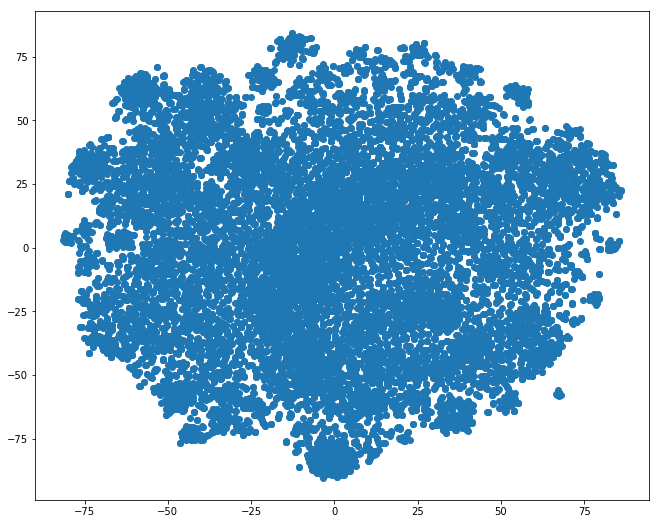

In [38]:
figure = plt.figure(figsize=(11, 9))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

In [39]:
#vector representation of user node
model.wv["217006"]

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([ 1.7551452 ,  0.88324594, -1.1575423 ,  2.166991  ,  0.43080223,
       -0.97214353, -1.1599292 ,  1.5365232 ,  0.07743552,  2.108448  ,
        2.7189012 , -1.3917439 , -0.03240253, -0.53036594,  0.05749288,
        1.0324956 ,  0.9529937 , -2.041844  , -2.346719  ,  1.8462293 ],
      dtype=float32)

In [79]:
model.wv["75888"]

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([ 1.3700914 ,  0.51615566, -1.3028294 ,  2.0980008 ,  0.06775954,
       -0.8735963 , -1.227877  ,  1.2081621 ,  0.14148505,  2.2061462 ,
        2.9897273 , -1.33987   , -0.02612547, -0.5211747 ,  0.3054781 ,
        1.0296924 ,  1.0959368 , -2.0496364 , -2.1242142 ,  1.961448  ],
      dtype=float32)

In [40]:
#vector representation of post ID edges
model.wv["T836662"]

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([-1.3395706 , -0.5484676 , -0.84297085,  0.11246559, -8.157164  ,
       -0.36433247, -0.5524664 , -4.5898685 , -1.6747466 ,  7.5272193 ,
        2.9913251 , -7.492771  ,  2.4596097 ,  3.3896859 , -3.648497  ,
       -3.719651  ,  0.7523044 , -1.7719797 ,  0.01109205,  4.0471487 ],
      dtype=float32)

In [80]:
model.wv["T823898"]

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([ 1.3295027 ,  1.2957153 , -2.4855165 ,  3.4218128 ,  1.4880224 ,
       -0.83460176, -0.80749476,  1.5123687 , -2.1526487 ,  4.394679  ,
        1.2332903 , -1.7399921 , -0.03273611, -1.770734  ,  1.8904817 ,
        4.1286864 ,  0.34655616,  0.17240068, -1.905689  ,  2.650306  ],
      dtype=float32)

In [46]:
X = model[model.vocab]

In [47]:
NUM_CLUSTERS=500

In [48]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[338 400 400 ... 327  15 327]
Centroids data
[[ 1.9961057   0.0772973   0.65168005 ... -2.9755652  -1.784341
   0.39975798]
 [-2.0805955  -2.0956483   0.9620572  ... -2.3539243  -1.5888717
  -0.26580817]
 [-2.1583748  -1.559587   -0.5452248  ... -1.0779936  -0.13520716
   2.7409725 ]
 ...
 [ 6.7586746  -2.8634787   3.1968071  ...  4.2367845  -1.1149069
  -1.6745917 ]
 [ 2.058604   -0.9835826  -0.782478   ... -3.0315452  -0.66714513
  -0.43896723]
 [ 1.9694276  -2.9396062  -0.92220587 ...  2.3096516   6.6868763
  -4.035733  ]]
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-201741.19
Silhouette_score: 
0.039958067


In [54]:
from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;

In [49]:
Z = model.wv.syn0

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [50]:
print(Z[0].shape)

(20,)


In [51]:
Z[0]

array([-4.82124758e+00,  3.78674841e+00,  1.06210899e+01,  5.03258467e+00,
       -6.87129736e+00, -2.15535712e+00, -1.52339518e+00, -4.69219732e+00,
       -2.16376246e-03,  4.92847061e+00, -1.15798032e+00,  2.03151202e+00,
       -4.20135593e+00, -1.04329884e-01,  1.13105869e+01, -7.98239186e-02,
       -5.86455345e-01,  4.26486395e-02, -4.33345509e+00,  2.03266430e+00],
      dtype=float32)

In [52]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [55]:
centers, clusters = clustering_on_wordvecs(Z, 500);
centroid_map = dict(zip(model.wv.index2word, clusters));

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [56]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

In [62]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
#Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
#Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
#A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df

In [97]:
top_words = get_top_words(model.wv.index2word, 50, centers, Z)

/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [98]:
top_words

,Cluster #0,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,...,Cluster #490,Cluster #491,Cluster #492,Cluster #493,Cluster #494,Cluster #495,Cluster #496,Cluster #497,Cluster #498,Cluster #499
1,200156,91380,T698678,T756523,105048,70010,T706917,T755815,T706689,223754,...,75617,T822169,T725362,133619,T799416,T728915,79897,T843663,T820940,T722416
2,T821402,150692,61406,T723288,205119,154732,T708390,T778731,T720997,223772,...,76797,T828040,T727852,136481,T798330,T740960,81145,234547,T816066,T724385
3,T821313,148607,T696751,T727906,188175,60122,T709367,T784548,T700363,230975,...,51355,T824304,T725012,108310,165772,T726960,81657,T845274,T831120,T764146
4,200547,200081,53232,85439,212197,47358,T720568,T759334,T721893,226826,...,76235,T821544,T722157,T772601,T808931,T729746,70936,T844606,T817698,T740600
5,199897,162533,63285,T728739,134080,66734,T719306,133949,T703776,222054,...,74541,T826860,T736292,132527,193240,T732651,74264,242244,192644,T723822
6,200329,159211,52861,T736025,147455,42742,T709454,T767610,T750035,224620,...,T727267,T825334,T720842,84772,162995,T732577,51643,231633,197174,T725859
7,200091,168399,56946,T750522,175224,71246,T727430,T758838,T708438,212627,...,76445,T822443,75427,63093,T807530,T729886,77856,234518,T812546,T724706
8,T820269,150231,61280,T732987,135809,85132,T718891,T771011,T706191,170730,...,72457,T824369,T704686,127070,T797847,T734879,79284,233120,T818119,T724592
9,199800,171969,62731,T735098,131432,66337,T707816,T779092,T706509,208273,...,77736,T833566,T726451,136279,T811243,T728116,75191,235847,T818775,T762923
10,200853,270038,62423,75512,160685,53020,T702785,T792115,T708491,212137,...,77343,T840866,T727498,85542,183847,T729137,84234,234460,192860,T724050


In [119]:
cluster_01 = top_words['Cluster #490']

In [155]:
cluster_01 = pd.DataFrame(cluster_01)

In [158]:
cluster_01.columns = ['UserID']

In [160]:
cluster_01

,UserID
1,75617
2,76797
3,51355
4,76235
5,74541
6,T727267
7,76445
8,72457
9,77736
10,77343


In [115]:
df_new.loc[df_new['UserID'] == 72728]

,UserID,Post_ID
38298,72728,T725534
38371,72728,T725573
38383,72728,T725573
38610,72728,T725764
40022,72728,T726454


In [123]:
df_new.loc[df_new['UserID'] == 72542]

,UserID,Post_ID
2021,72542,T659984
2023,72542,T659984
33118,72542,T722464
33277,72542,T722464
33358,72542,T722464
33360,72542,T722464


In [129]:
df_new.loc[df_new['UserID'] == 67971]

,UserID,Post_ID
25899,67971,T709349
26684,67971,T718874
42534,67971,T728266
42575,67971,T728266
42614,67971,T728266
43085,67971,T728266
43195,67971,T728266
84394,67971,T729100
84400,67971,T729100


In [131]:
df_new.loc[df_new['Post_ID'] == 'T727267']

,UserID,Post_ID
336696,75617,T727267
336697,54184,T727267


In [147]:
df.loc[df['Post_ID'] == 'T773375']

,UserID,Post_ID
220093,118099,T773375
220094,83780,T773375
220095,122645,T773375
220096,134270,T773375
220097,120961,T773375
220098,122645,T773375
220099,134270,T773375
220100,134270,T773375
220101,120961,T773375
220102,62173,T773375


In [137]:
df[df['UserID'] == 75563]

,UserID,Post_ID
32414,75563,T721741
37995,75563,T725346
37999,75563,T725346
90665,75563,T731529


In [142]:
df[df['UserID'] == 75617]

,UserID,Post_ID
40264,75617,T726620
40272,75617,T726620


In [146]:
df[df['UserID']==11809]

,UserID,Post_ID
40283,11809,T726620


In [151]:
df[df['UserID']==74228]

,UserID,Post_ID
4050,74228,T691962
4060,74228,T691962
4064,74228,T691962
4067,74228,T691962
4080,74228,T691962
4084,74228,T691962
4089,74228,T691962
4094,74228,T691962
4122,74228,T691962
34981,74228,T723155


In [154]:
df[df['UserID']==75563]

,UserID,Post_ID
32414,75563,T721741
37995,75563,T725346
37999,75563,T725346
90665,75563,T731529


In [161]:
Y = pd.merge(df, cluster_01, on='UserID', how='inner')

In [168]:
final_df = Y.sort_values(by=['Post_ID'], ascending=True)

In [169]:
final_df

,UserID,Post_ID
0,76205,T547585
1,76205,T547585
5,72728,T692045
8,54184,T703251
9,54184,T703251
17,68996,T703925
16,68996,T703925
14,73679,T703925
27,90627,T706568
28,67772,T706568


In [170]:
print (len(list(model.wv.vocab)))

38100


/Users/maitreyimokashi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
